In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_csv('binary.csv',header=0)

In [3]:
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [5]:
data.shape

(400, 4)

In [6]:
data.duplicated().sum()

5

In [7]:
df= pd.DataFrame(data, columns= ['admit','gre','gpa','rank'])

In [8]:

dup_data= df[df.duplicated()]
print(dup_data)

     admit  gre   gpa  rank
59       0  600  2.82     4
77       1  800  4.00     3
202      1  700  4.00     1
263      1  620  3.95     3
398      0  700  3.65     2


In [9]:
data= data.drop_duplicates()
print(data.shape)

(395, 4)


In [10]:
import seaborn as sns

<AxesSubplot:title={'center':'gre'}, xlabel='rank'>

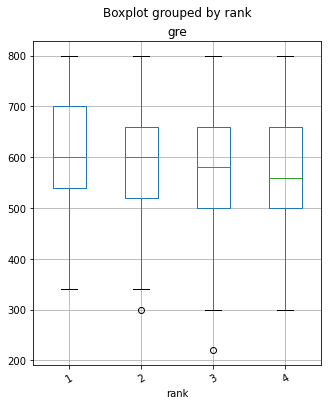

In [11]:
data.boxplot('gre','rank',rot=30,figsize=(5,6))

<AxesSubplot:title={'center':'gpa'}, xlabel='rank'>

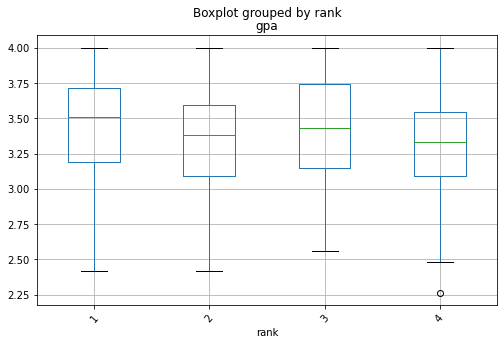

In [12]:
data.boxplot('gpa','rank',rot=50,figsize=(8,5))

<AxesSubplot:title={'center':'gre'}, xlabel='admit'>

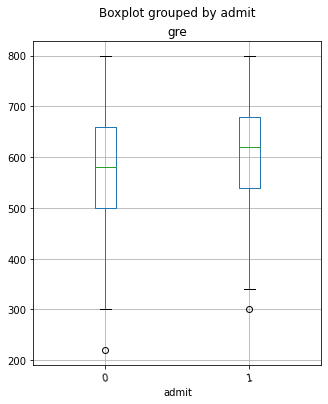

In [13]:
data.boxplot('gre','admit',rot=10,figsize=(5,6))

<AxesSubplot:title={'center':'rank'}, xlabel='admit'>

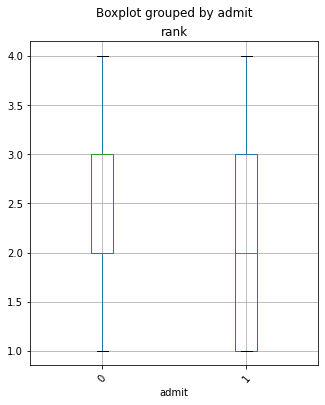

In [14]:
data.boxplot('rank','admit',rot=50,figsize=(5,6))

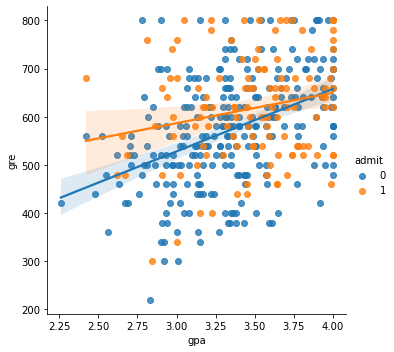

In [15]:

sns.lmplot(x='gpa',y='gre',hue='admit',data=data)

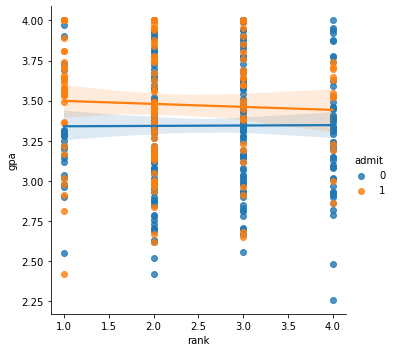

In [16]:
sns.lmplot(x='rank',y='gpa',hue='admit',data=data)

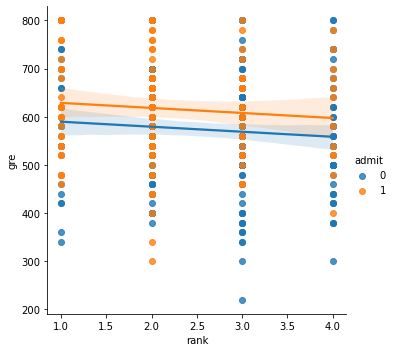

In [17]:
sns.lmplot(x='rank',y='gre',hue='admit',data=data)

<AxesSubplot:xlabel='admit', ylabel='gre'>

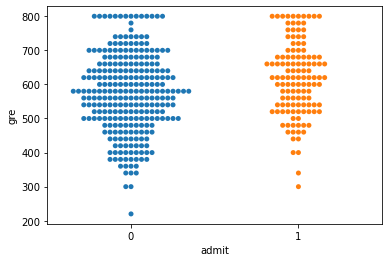

In [18]:
sns.swarmplot(x='admit',y='gre',data=data)

<AxesSubplot:xlabel='admit', ylabel='gpa'>

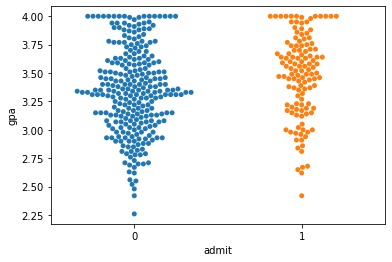

In [19]:
sns.swarmplot(x='admit',y='gpa',data=data)

In [20]:
data.isnull().values.sum()

0

In [21]:
data_col= list(data.columns)

In [22]:
data_col

['admit', 'gre', 'gpa', 'rank']

C:\Users\santosh2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


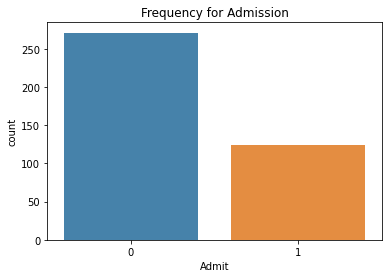

In [23]:
admit_freq= data['admit'].value_counts()
sns.barplot(admit_freq.index,admit_freq.values,alpha=0.9)
plt.title('Frequency for Admission')
plt.xlabel('Admit')
plt.ylabel('count')
plt.show()

C:\Users\santosh2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


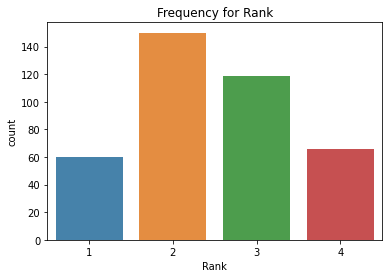

In [24]:
rank_freq= data['rank'].value_counts()
sns.barplot(rank_freq.index,rank_freq.values,alpha=0.9)
plt.title('Frequency for Rank')
plt.xlabel('Rank')
plt.ylabel('count')
plt.show()

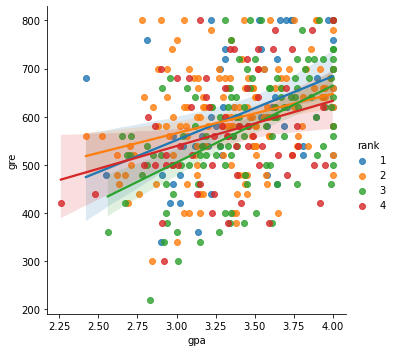

In [25]:
sns.lmplot(x='gpa',y='gre',hue='rank',data=data)

<AxesSubplot:>

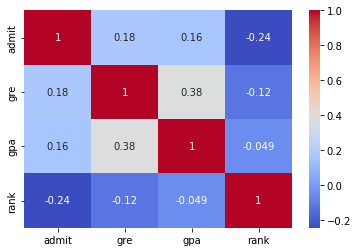

In [26]:
sns.heatmap(data= data.corr(), annot=True,cmap='coolwarm')

In [27]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
admit,395.0,0.313924,0.464674,0.00,0.00,0.00,1.000,1.0
gre,395.0,586.481013,115.457692,220.00,510.00,580.00,660.000,800.0
gpa,395.0,3.386177,0.378118,2.26,3.13,3.39,3.655,4.0
rank,395.0,2.483544,0.943375,1.00,2.00,2.00,3.000,4.0


In [28]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression


In [29]:
Y= data['admit']
X=data.drop('admit',axis=1)

In [30]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=1)

In [31]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(316, 3) (79, 3) (316,) (79,)


In [32]:
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [33]:
model.classes_

array([0, 1], dtype=int64)

In [34]:
model.intercept_

array([-2.71958586])

In [35]:
model.coef_

array([[ 0.00181542,  0.66720456, -0.60517965]])

In [36]:
pred= model.predict(x_test)

In [37]:
model.score(x_test,y_test)

0.6835443037974683

In [38]:
print(model.intercept_,model.coef_)

[-2.71958586] [[ 0.00181542  0.66720456 -0.60517965]]


In [39]:
model.predict_proba(x_test)

array([[0.62522821, 0.37477179],
       [0.36766926, 0.63233074],
       [0.84988269, 0.15011731],
       [0.82806863, 0.17193137],
       [0.61671923, 0.38328077],
       [0.6709892 , 0.3290108 ],
       [0.83757203, 0.16242797],
       [0.72302732, 0.27697268],
       [0.70370276, 0.29629724],
       [0.78098364, 0.21901636],
       [0.48768419, 0.51231581],
       [0.70292572, 0.29707428],
       [0.68408955, 0.31591045],
       [0.76214203, 0.23785797],
       [0.81358446, 0.18641554],
       [0.86730796, 0.13269204],
       [0.63381387, 0.36618613],
       [0.53384008, 0.46615992],
       [0.46891832, 0.53108168],
       [0.87036686, 0.12963314],
       [0.67961283, 0.32038717],
       [0.62305373, 0.37694627],
       [0.89784723, 0.10215277],
       [0.54627841, 0.45372159],
       [0.46135241, 0.53864759],
       [0.65769497, 0.34230503],
       [0.74202222, 0.25797778],
       [0.7785856 , 0.2214144 ],
       [0.90390418, 0.09609582],
       [0.85736499, 0.14263501],
       [0.

In [40]:
cm= confusion_matrix(y_test,pred)
print(cm)

[[49  4]
 [21  5]]


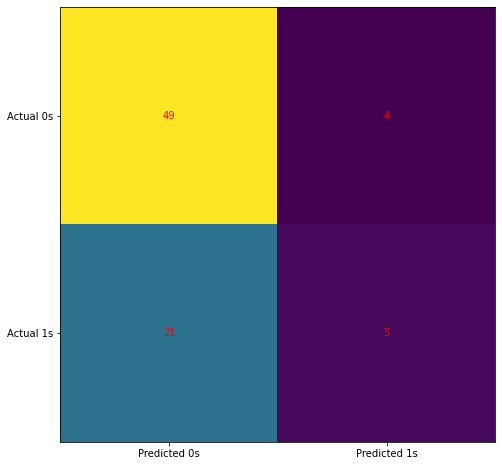

In [41]:
fig,axes= plt.subplots(figsize=(8,8))
axes.imshow(cm)
axes.grid(False)
axes.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
axes.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
for i in range(2):
    for j in range(2):
        axes.text(j,i,cm[i,j],ha='center',va='center',color='red')
        
plt.show()

In [42]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.70      0.92      0.80        53
           1       0.56      0.19      0.29        26

    accuracy                           0.68        79
   macro avg       0.63      0.56      0.54        79
weighted avg       0.65      0.68      0.63        79



In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [44]:
accuracy= []
k_value= []
for i in range(1,10):
    knn_model = KNeighborsClassifier(n_neighbors= i)
    knn_model.fit(x_train,y_train)
    knn_pred= knn_model.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test,knn_pred))
    k_value.append(i)

In [45]:
knn_model1= KNeighborsClassifier(n_neighbors= 8)
knn_model1.fit(x_train,y_train)
knn_pred1= knn_model1.predict(x_test)
metrics.accuracy_score(y_test,knn_pred1)

0.7215189873417721

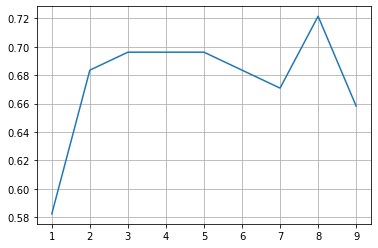

In [46]:
plt.plot(k_value,accuracy)
plt.grid()

In [47]:
y_test= np.asarray(y_test)

In [48]:
for i in range (len(y_test)):
    print('The Actual class is {} and the predicted class is {}'.format(y_test[i],knn_pred1[i]))

The Actual class is 1 and the predicted class is 0
The Actual class is 0 and the predicted class is 0
The Actual class is 0 and the predicted class is 0
The Actual class is 0 and the predicted class is 0
The Actual class is 1 and the predicted class is 0
The Actual class is 0 and the predicted class is 0
The Actual class is 0 and the predicted class is 0
The Actual class is 0 and the predicted class is 0
The Actual class is 0 and the predicted class is 0
The Actual class is 1 and the predicted class is 0
The Actual class is 1 and the predicted class is 1
The Actual class is 0 and the predicted class is 0
The Actual class is 0 and the predicted class is 0
The Actual class is 0 and the predicted class is 0
The Actual class is 1 and the predicted class is 0
The Actual class is 0 and the predicted class is 0
The Actual class is 1 and the predicted class is 1
The Actual class is 0 and the predicted class is 0
The Actual class is 0 and the predicted class is 0
The Actual class is 1 and the p

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [50]:
sc = StandardScaler()

In [51]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [52]:
dt_model = DecisionTreeClassifier(splitter='best')
dt_model= dt_model.fit(x_train,y_train)

In [53]:
pred_dt = dt_model.predict(x_test)
metrics.accuracy_score(y_test,pred_dt)

0.6455696202531646

In [54]:
cm_dt = confusion_matrix(y_test,pred_dt)
cm_dt

array([[36, 17],
       [11, 15]], dtype=int64)

In [55]:
conda install python-graphviz

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\santosh2\anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2021.11  |           py39_0           7 KB
    anaconda-custom            |           py39_1           4 KB
    ca-certificates-2022.07.19 |       haa95532_0         123 KB
    certifi-2022.6.15          |   py39haa95532_0         153 KB
    conda-4.12.0               |   py39haa95532_0        14.5 MB
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    openssl-1.1.1q             |       h2bbff1b_0         4.8 MB
    python-graphviz-0.20.1     | 


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2021.11=py39_0
  - defaults/win-64::astropy==4.3.1=py39hc7d831d_0
  - defaults/win-64::bkcharts==0.2=py39haa95532_0
  - defaults/win-64::bokeh==2.4.1=py39haa95532_0
  - defaults/win-64::bottleneck==1.3.2=py39h7cc1a96_1
  - defaults/win-64::daal4py==2021.3.0=py39h757b272_0
  - defaults/noarch::dask==2021.10.0=pyhd3eb1b0_0
  - defaults/win-64::h5py==3.2.1=py39h3de5c98_0
  - defaults/win-64::imagecodecs==2021.8.26=py39ha1f97ea_0
  - defaults/noarch::imageio==2.9.0=pyhd3eb1b0_0
  - defaults/win-64::matplotlib==3.4.3=py39haa95532_0
  - defaults/win-64::matplotlib-base==3.4.3=py39h49ac443_0
  - defaults/win-64::mkl_fft==1.3.1=py39h277e83a_0
  - defaults/win-64::mkl_random==1.2.2=py39hf11a4ad_0
  - defaults/win-64::numba==0.54.1=py39hf11a4ad_0
  - defaults/win-64::numexpr==2.7.3=py39hb80d3ca_1
  - defaults/win-64::numpy==1.20.3=py39ha4


openssl-1.1.1q       | 4.8 MB    | #7         |  18% 
openssl-1.1.1q       | 4.8 MB    | ##3        |  23% 
openssl-1.1.1q       | 4.8 MB    | ##9        |  30% 
openssl-1.1.1q       | 4.8 MB    | ###6       |  36% 
openssl-1.1.1q       | 4.8 MB    | ####6      |  46% 
openssl-1.1.1q       | 4.8 MB    | #####4     |  54% 
openssl-1.1.1q       | 4.8 MB    | ######4    |  64% 
openssl-1.1.1q       | 4.8 MB    | #######5   |  75% 
openssl-1.1.1q       | 4.8 MB    | ########7  |  88% 
openssl-1.1.1q       | 4.8 MB    | ########## | 100% 
openssl-1.1.1q       | 4.8 MB    | ########## | 100% 

graphviz-2.38        | 29.3 MB   |            |   0% 
graphviz-2.38        | 29.3 MB   |            |   0% 
graphviz-2.38        | 29.3 MB   |            |   1% 
graphviz-2.38        | 29.3 MB   | 1          |   1% 
graphviz-2.38        | 29.3 MB   | 1          |   2% 
graphviz-2.38        | 29.3 MB   | 2          |   2% 
graphviz-2.38        | 29.3 MB   | 3          |   3% 
graphviz-2.38        | 29.

In [56]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [57]:

pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [58]:
feature_cols =  data.iloc[:,[1,2,3]].values

In [59]:
feature_cols = pd.DataFrame(feature_cols)
feature_cols.columns = ['gre','gpa','rank']

In [60]:
# from sklearn.tree import export_graphviz
# from six import StringIO  
# from IPython.display import Image  
# import pydotplusdot_data= StringIO()
# export_graphviz(dt_model, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feature_cols,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [61]:
# from sklearn import tree
# from IPython.display import Image
# import pydotplus
# dot_data = tree.export_graphviz(dt_model,out_file='resume.dot',feature_names= list(data.drop('admit',axis=1)),class_names=['0','1'],filled=True,rounded=True,special_characters=True,leaves_parallel=False)
# graph= pydotplus.graphviz.graph_from_dot_file('resume.dot')
# Image(graph.create_png())

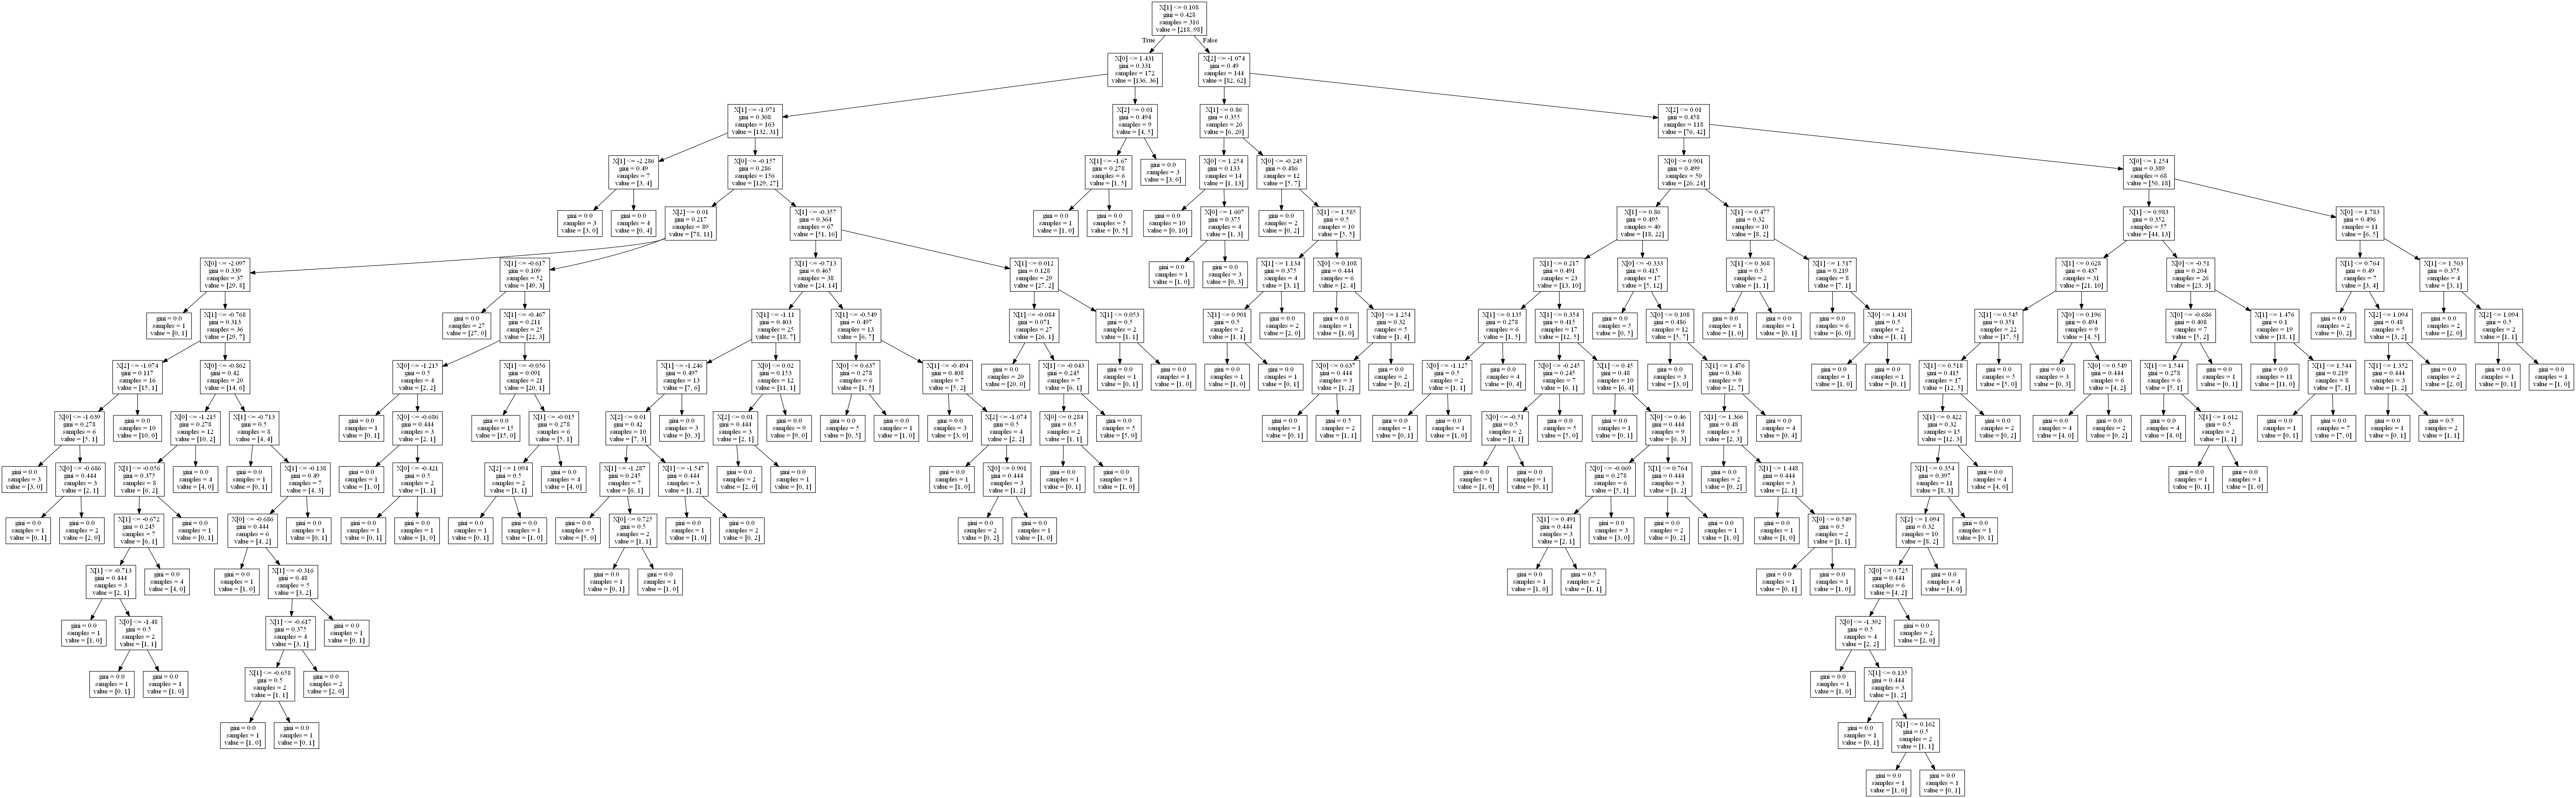

In [62]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

from IPython.display import Image
import pydotplus
dot_data = tree.export_graphviz(clf)
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())